In [1]:
import video.vid as v
import pandas as pd
from video import df
import numpy as np
from importlib import reload
from cv2 import inRange
import matplotlib.pyplot as plt
from video.conversion import Conversions

In [2]:
reload(v)
path = 'videos/Red Spin.mp4'
vid = v.Video.from_file(path)
vid_df = df.get_vid_df(path)

## Testing that outputs are the same as `df`

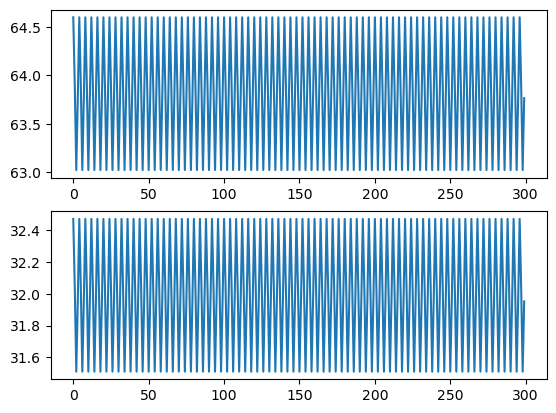

In [3]:
reload(v)
fig, axs = plt.subplots(2,1)
axs[0].plot(vid.value.agg('mean') )
axs[1].plot(vid_df.groupby(level=0).lightness.mean())
plt.show()

AttributeError: 'NoneType' object has no attribute 'pct_change'

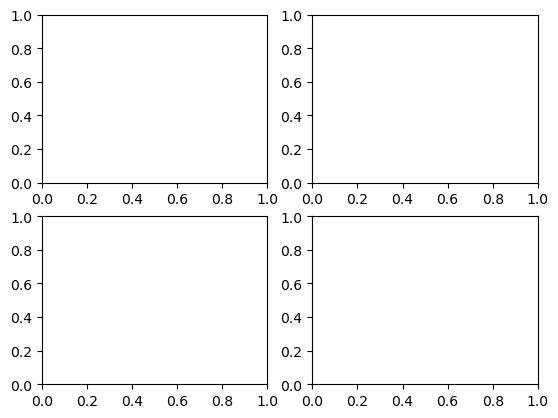

In [11]:
reload(v)

fig, axs = plt.subplots(2,2)
axs[0,0].plot(vid.pct_change(1,'lightness'))
axs[0][1].plot(vid.lightness.pct_change(1))
axs[1,0].plot(vid.hue.agg('sum'))

In [29]:
reload(v)
from video.conversion import Conversions
from cv2 import COLOR_BGR2RGB
new_vid = v.Video.from_file('videos/Banned Pokemon Seizure Scene.mp4',Conversions.HSV)
new_vid.mask(0).show()

error: OpenCV(4.7.0) /Users/runner/miniforge3/conda-bld/libopencv_1675730058235/work/modules/core/src/arithm.cpp:1742: error: (-209:Sizes of input arguments do not match) The lower boundary is neither an array of the same size and same type as src, nor a scalar in function 'inRange'
